<a href="https://colab.research.google.com/github/sriinetizen/Project-/blob/main/Rumour_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import json
import pandas as pd

# Function to extract data from a single JSON file
def extract_data_from_json(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
        text = data.get('text', '')
        retweet_count = data.get('retweet_count', 0)
        favorite_count = data.get('favorite_count', 0)
        hashtags = [hashtag['text'] for hashtag in data.get('entities', {}).get('hashtags', [])]
        mentions = [mention['screen_name'] for mention in data.get('entities', {}).get('user_mentions', [])]
        return text, retweet_count, favorite_count, hashtags, mentions

# Function to iterate through nested folders and collect data
def load_dataset(directory):
    texts, retweet_counts, favorite_counts, hashtags_list, mentions_list, labels = [], [], [], [], [], []

    # Iterate over the 5 event folders
    for event_folder in os.listdir(directory):
        event_folder_path = os.path.join(directory, event_folder)

        # Inside each event folder, look for 'rumours' and 'non-rumours' folders
        for rumor_type in ['rumours', 'non-rumours']:
            rumor_type_path = os.path.join(event_folder_path, rumor_type)

            # Debugging: Print the path being checked
            print(f"Checking path: {rumor_type_path}")

            if not os.path.exists(rumor_type_path):
                print(f"Path does not exist: {rumor_type_path}")
                continue  # Skip to the next folder if path does not exist

            label = 1 if rumor_type == 'rumours' else 0  # 1 for rumours, 0 for non-rumours

            # Iterate through each subfolder (folder1, folder2, etc.) inside the rumours/non-rumours folders
            for subfolder in os.listdir(rumor_type_path):
                subfolder_path = os.path.join(rumor_type_path, subfolder)

                source_tweet_path = os.path.join(subfolder_path, 'source-tweet')
                reactions_path = os.path.join(subfolder_path, 'reactions')

                # Process source-tweet folder
                if os.path.exists(source_tweet_path):
                    for json_file in os.listdir(source_tweet_path):
                        json_file_path = os.path.join(source_tweet_path, json_file)
                        text, retweet_count, favorite_count, hashtags, mentions = extract_data_from_json(json_file_path)
                        texts.append(text)
                        retweet_counts.append(retweet_count)
                        favorite_counts.append(favorite_count)
                        hashtags_list.append(hashtags)
                        mentions_list.append(mentions)
                        labels.append(label)

                # Process reactions folder
                if os.path.exists(reactions_path):
                    for json_file in os.listdir(reactions_path):
                        json_file_path = os.path.join(reactions_path, json_file)
                        text, retweet_count, favorite_count, hashtags, mentions = extract_data_from_json(json_file_path)
                        texts.append(text)
                        retweet_counts.append(retweet_count)
                        favorite_counts.append(favorite_count)
                        hashtags_list.append(hashtags)
                        mentions_list.append(mentions)
                        labels.append(label)

    # Return the collected data in a pandas DataFrame
    return pd.DataFrame({
        'text': texts,
        'retweet_count': retweet_counts,
        'favorite_count': favorite_counts,
        'hashtags': hashtags_list,
        'mentions': mentions_list,
        'label': labels
    })

# Path to the main dataset directory containing the 5 folders
data_directory = 'pheme-rnr-dataset'  # Replace with your actual dataset path

# Load the dataset
df = load_dataset(data_directory)

# Check the extracted data
print(df.head())


Checking path: pheme-rnr-dataset\charliehebdo\rumours
Checking path: pheme-rnr-dataset\charliehebdo\non-rumours
Checking path: pheme-rnr-dataset\ferguson\rumours
Checking path: pheme-rnr-dataset\ferguson\non-rumours
Checking path: pheme-rnr-dataset\germanwings-crash\rumours
Checking path: pheme-rnr-dataset\germanwings-crash\non-rumours
Checking path: pheme-rnr-dataset\ottawashooting\rumours
Checking path: pheme-rnr-dataset\ottawashooting\non-rumours
Checking path: pheme-rnr-dataset\sydneysiege\rumours
Checking path: pheme-rnr-dataset\sydneysiege\non-rumours
                                                text  retweet_count  \
0  Breaking: At least 10 dead, 5 injured after tO...            159   
1  @H_E_Samuel @George_Berridge @michael_taggart ...              1   
2  @H_E_Samuel Hi Henry would you be willing to g...              0   
3  @H_E_Samuel @H_E_Samuel please call them terro...              0   
4  @H_E_Samuel French govt needs to take strict a...              0   

   favori

In [ ]:
df

,text,retweet_count,favorite_count,hashtags,mentions,label
0,"Breaking: At least 10 dead, 5 injured after tO...",159,14,[],[],1
1,@H_E_Samuel @George_Berridge @michael_taggart ...,1,0,[],"[H_E_Samuel, George_Berridge, michael_taggart]",1
2,@H_E_Samuel Hi Henry would you be willing to g...,0,0,[],[H_E_Samuel],1
3,@H_E_Samuel @H_E_Samuel please call them terro...,0,1,[],"[H_E_Samuel, H_E_Samuel]",1
4,@H_E_Samuel French govt needs to take strict a...,0,0,[],[H_E_Samuel],1
...,...,...,...,...,...,...
103207,"@heyradar @MarkMcCleskey @JohnMartin929 crap, ...",0,0,[],"[heyradar, MarkMcCleskey, JohnMartin929]",0
103208,@piiizzzzaaaa @heyradar hahahaha,0,0,[],"[piiizzzzaaaa, heyradar]",0
103209,@Jon_Roser @heyradar @JohnMartin929 It's @chra...,0,0,[],"[Jon_Roser, heyradar, JohnMartin929, chrabe]",0
103210,@JohnMartin929 @MarkMcCleskey @PzFeed had to b...,0,0,[],"[JohnMartin929, MarkMcCleskey, PzFeed]",0


In [ ]:
# Save the DataFrame as a CSV file
df.to_csv('rumor_dataset.csv', index=False)  # index=False avoids saving row numbers


In [ ]:
print(df.columns)


Index(['text', 'retweet_count', 'favorite_count', 'hashtags', 'mentions',
       'label'],
      dtype='object')


In [ ]:
import os
import pandas as pd
df=pd.read_csv('rumor_dataset.csv')

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_text = tfidf.fit_transform(df['text'])  # Text data

# Extract numerical features
X_numerical = df[['text','retweet_count', 'favorite_count', 'hashtags', 'mentions']].values  # Numerical data

# Combine text and numerical features
X_combined = np.hstack((X_text.toarray(), X_numerical))  # Combine into one feature set

# Define the target variable (labels)
y = df['label'].values  # Labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [ ]:
print(f"Shape of X: {X_numerical.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (103212, 5)
Shape of y: (103212,)


In [ ]:
# Apply pd.get_dummies with sparse=True to save memory
X_numerical_dummies = pd.get_dummies('X_numerical, sparse=True')
print(X_numerical)

[['Breaking: At least 10 dead, 5 injured after tO gunman open fire in offices of Charlie  Hebdo,satirical mag that published Mohammed cartoons'
  159 14 '[]' '[]']
 ['@H_E_Samuel @George_Berridge @michael_taggart The religion of peace strikes again.'
  1 0 '[]' "['H_E_Samuel', 'George_Berridge', 'michael_taggart']"]
 ['@H_E_Samuel Hi Henry would you be willing to give ITV News a phone interview for our Lunchtime bulletin in 2 hours?'
  0 0 '[]' "['H_E_Samuel']"]
 ...
 ['@Jon_Roser @heyradar @JohnMartin929 It\'s @chrabe\'s favorite. "Walk up to yo House"'
  0 0 '[]' "['Jon_Roser', 'heyradar', 'JohnMartin929', 'chrabe']"]
 ['@JohnMartin929 @MarkMcCleskey @PzFeed had to be done.' 0 0 '[]'
  "['JohnMartin929', 'MarkMcCleskey', 'PzFeed']"]
 ['@MarkMcCleskey @Jon_Roser @heyradar @JohnMartin929 hahaha! The best.'
  0 0 '[]' "['MarkMcCleskey', 'Jon_Roser', 'heyradar', 'JohnMartin929']"]]


In [ ]:
from sklearn.feature_extraction import FeatureHasher
# Define the number of output features (you can tune this to reduce memory usage)
hasher = FeatureHasher(n_features=1024, input_type='string')
# Apply hashing trick on categorical columns
X_hashed = hasher.transform(X_numerical.astype(str))


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_numerical=pd.DataFrame(X_numerical)
# Apply LabelEncoder to each categorical column
for col in X_numerical.columns:
    X_numerical[col] = label_encoder.fit_transform(X_numerical[col])


In [ ]:
# Use chunksize when reading data
for chunk in pd.read_csv('rumor_dataset.csv', chunksize=10000):
    # Process each chunk
    X_numerical_dummies = pd.get_dummies(chunk, sparse=True)
    # Train or append your model here


In [ ]:
from sklearn.decomposition import PCA

# Use PCA to reduce dimensionality
pca = PCA(n_components=100)  # Choose a suitable number of components
X_reduced = pca.fit_transform(X_numerical_dummies)


C:\Users\dilee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:869: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\dilee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1059: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):


In [ ]:
import pandas as pd

# Check if X_numerical is already a DataFrame
if not isinstance(X_numerical, pd.DataFrame):
    X_numerical = pd.DataFrame(X_numerical)

# Apply pd.get_dummies() to the entire DataFrame
X_numerical_dummies = pd.get_dummies(X_numerical)
print(X_numerical)

            0    1   2     3      4
0       87104  158  14  6229  35502
1       21954    1   0  6229   7792
2       21959    0   0  6229   7795
3       21955    0   1  6229   7793
4       21958    0   0  6229   7795
...       ...  ...  ..   ...    ...
103207  64986    0   0  6229  25992
103208  76405    0   0  6229  31157
103209  25932    0   0  6229   9540
103210  25846    0   0  6229   9493
103211  30570    0   0  6229  11625

[103212 rows x 5 columns]


In [ ]:
import numpy as np
from scipy.sparse import hstack
# Assuming X_text is a sparse matrix from TfidfVectorizer and X_numerical is a dense numpy array
X_combined = np.hstack([X_text.toarray(), X_numerical])


In [ ]:
# Reduce the max number of features in TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=1000)  # Try reducing to 1000 or even less
X_text = tfidf.fit_transform(df['text'].fillna(''))  # Vectorize the text

# Combine text and numerical features
X_combined = np.hstack((X_text.toarray(), X_numerical))


In [ ]:
y_train

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame with 'text' and 'label' columns

# 1. Vectorize the text data using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit vocabulary size to 5000 words
X_tfidf = tfidf.fit_transform(df['text'].values)

# 2. Get labels
y = df['label'].values

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 4. Optionally scale the data if needed (StandardScaler isn't strictly necessary for TF-IDF)
# Initialize the scaler with `with_mean=False` (since TF-IDF data is sparse)
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 6. Predict on the test set
y_pred = model.predict(X_test_scaled)


In [ ]:
pip install tensorflow

In [ ]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'].values)

X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=200)  # Padding sequences to make them the same length

y = df['label'].values  # Labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))  # Removed input_length
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
score, acc = model.evaluate(X_test, y_test, batch_size=64)
print(f"Test Accuracy: {acc}")


Epoch 1/5
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 246s 188ms/step - accuracy: 0.7615 - loss: 0.5056 - val_accuracy: 0.8378 - val_loss: 0.3601
Epoch 2/5
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 216s 168ms/step - accuracy: 0.8441 - loss: 0.3432 - val_accuracy: 0.8413 - val_loss: 0.3511
Epoch 3/5
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 229s 178ms/step - accuracy: 0.8569 - loss: 0.3098 - val_accuracy: 0.8364 - val_loss: 0.3484
Epoch 4/5
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 225s 174ms/step - accuracy: 0.8651 - loss: 0.2924 - val_accuracy: 0.8365 - val_loss: 0.3502
Epoch 5/5
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 237s 184ms/step - accuracy: 0.8739 - loss: 0.2742 - val_accuracy: 0.8395 - val_loss: 0.3630
323/323 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.8444 - loss: 0.3568
Test Accuracy: 0.8394613265991211


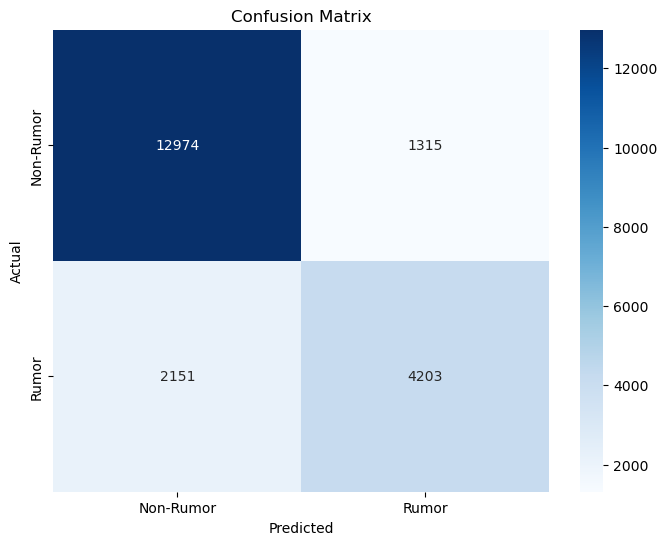

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Rumor', 'Rumor'], yticklabels=['Non-Rumor', 'Rumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


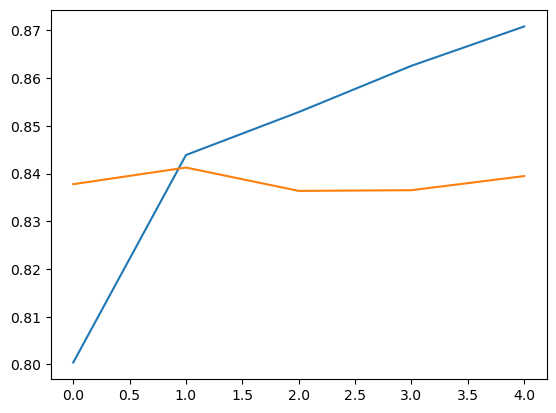

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


In [ ]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


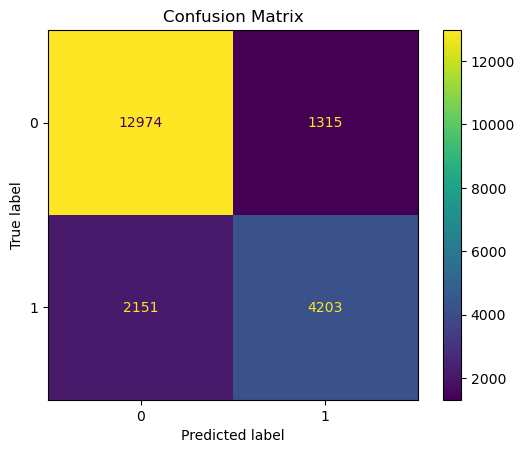

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


646/646 ━━━━━━━━━━━━━━━━━━━━ 429s 664ms/step


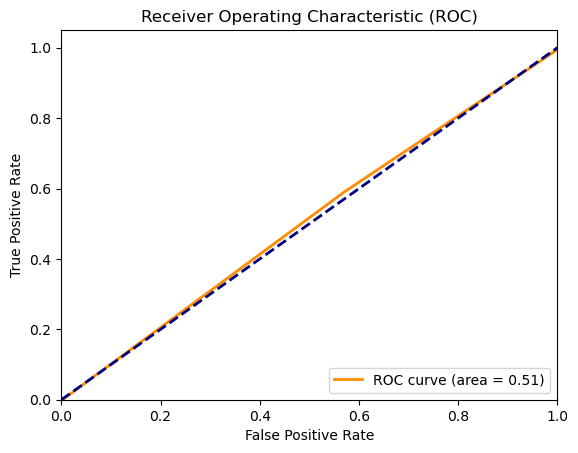

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute predicted probabilities using model.predict() in Keras/TensorFlow
y_proba = model.predict(X_test_scaled)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
%matplotlib inline


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.6919052463304752
Precision: 0.25
Recall: 0.00047214353163361664
F1 Score: 0.000942507068803016
ROC AUC: 0.5210695166174102


C:\Users\dilee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))



Accuracy: 0.6181756527636487
Precision: 0.3845223700120919
Recall: 0.4003777148253069
F1 Score: 0.392289899768697
ROC AUC: 0.5564926173369801


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.7176282517076006
Precision: 0.6975169300225733
Recall: 0.14589235127478753
F1 Score: 0.2413119875048809
ROC AUC: 0.6404880442181962


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

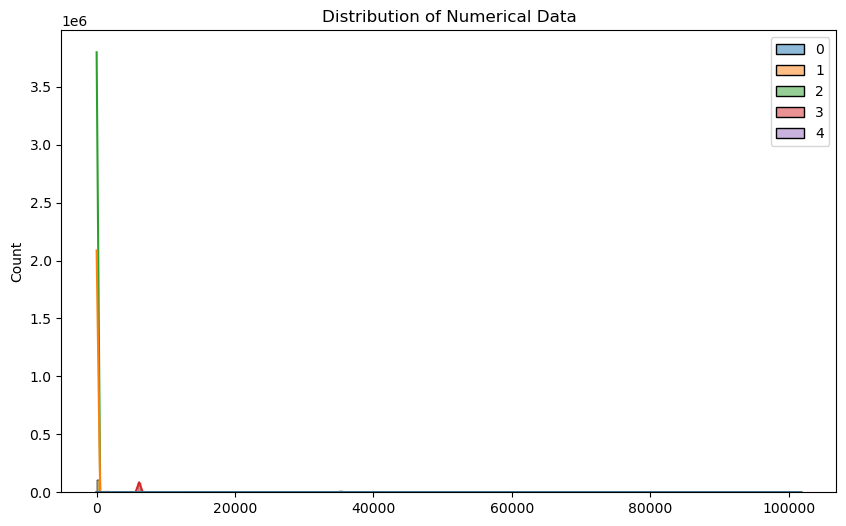

In [ ]:
# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=X_numerical, kde=True)
plt.title('Distribution of Numerical Data')
plt.show()


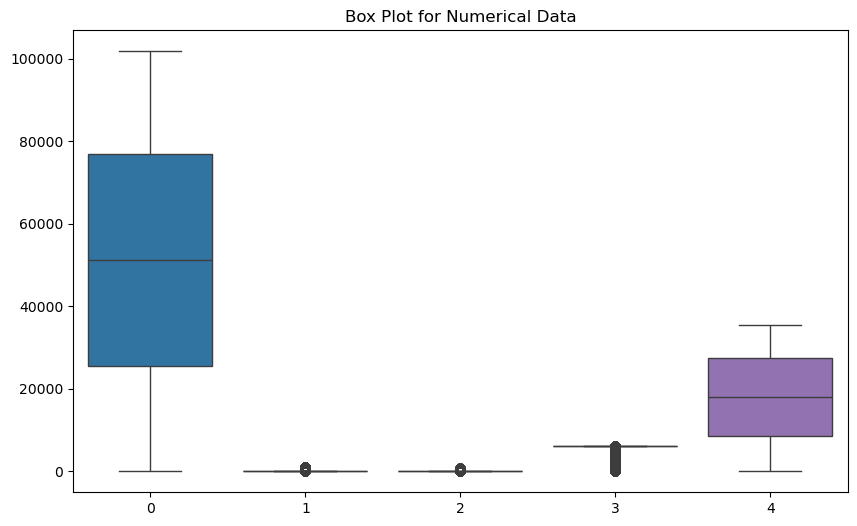

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_numerical)
plt.title('Box Plot for Numerical Data')
plt.show()

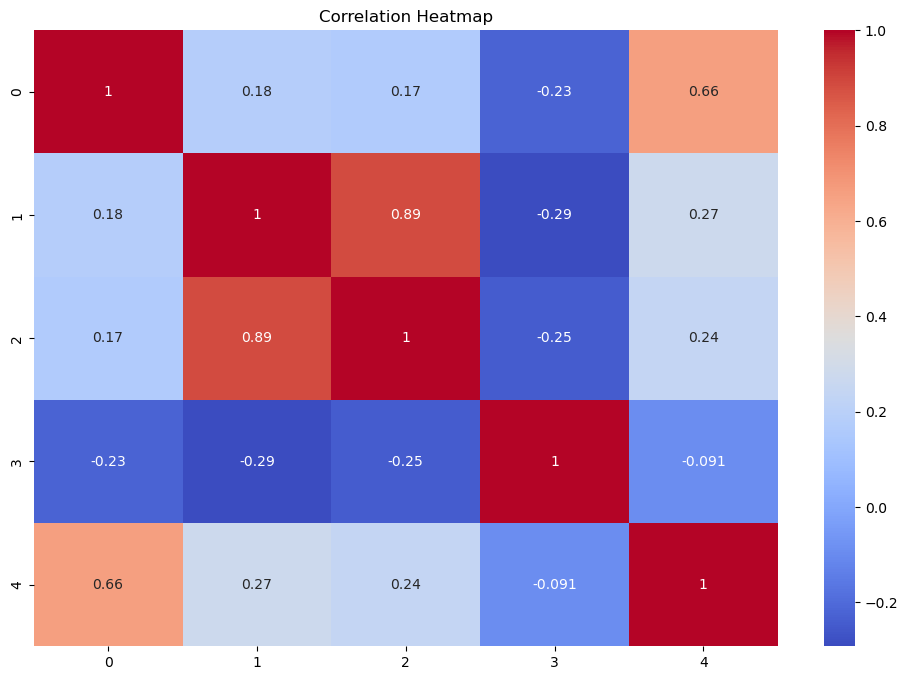

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


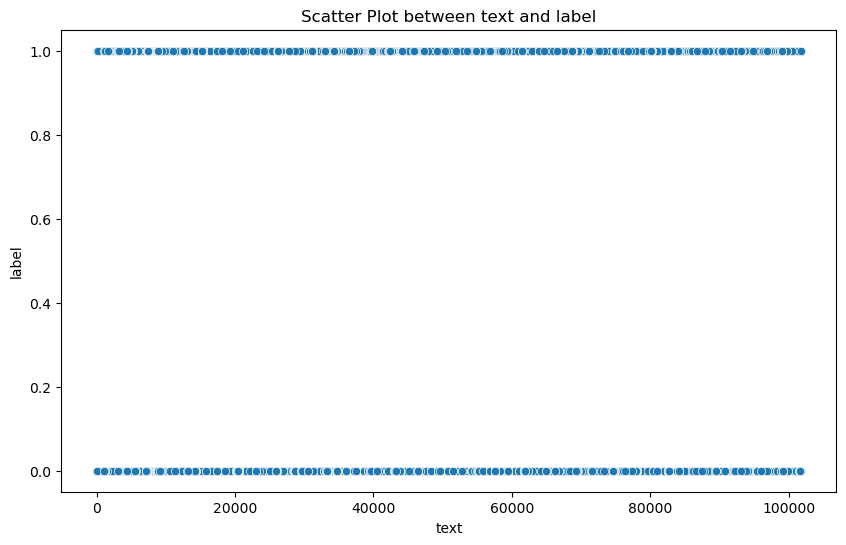

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_numerical['text'], y=df['label'])
plt.title('Scatter Plot between text and label')
plt.show()


In [ ]:
# Display the column names of X_numerical
print(X_numerical.columns)


RangeIndex(start=0, stop=5, step=1)


In [ ]:
# Example: Assigning column names manually
X_numerical.columns = ['text', 'retweet_count', 'favorite_count', 'hashtags', 'mentions']

# Display the column names
print(X_numerical.columns)


Index(['text', 'retweet_count', 'favorite_count', 'hashtags', 'mentions'], dtype='object')


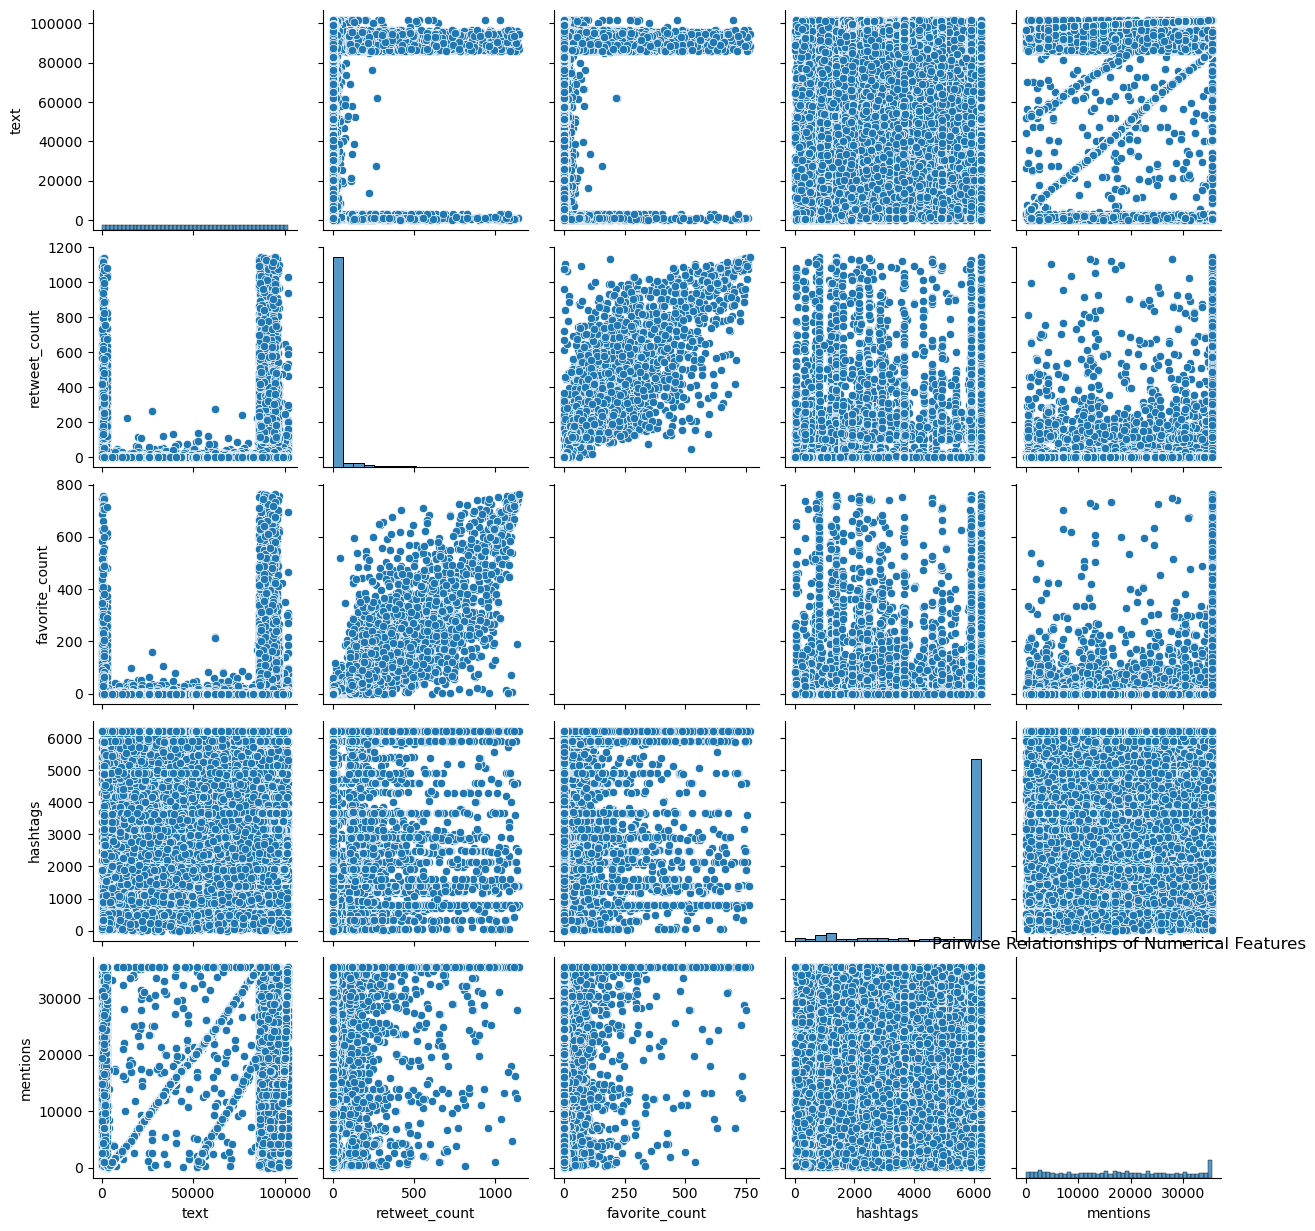

In [ ]:
sns.pairplot(X_numerical)
plt.title("Pairwise Relationships of Numerical Features")
plt.show()


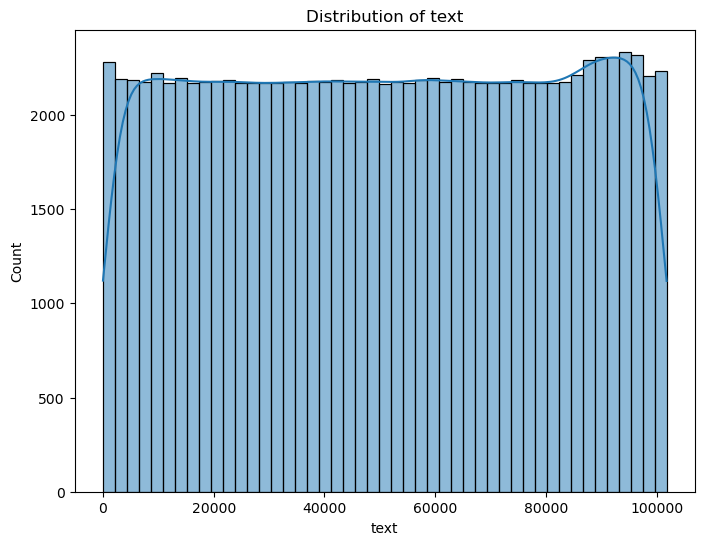

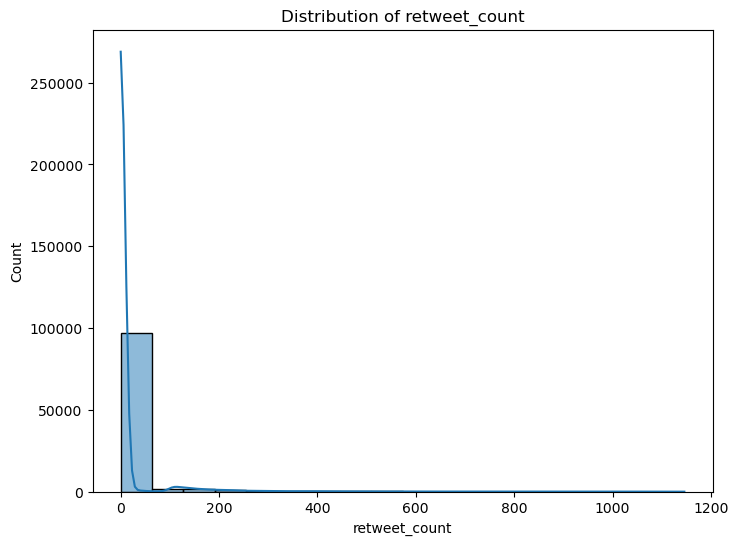

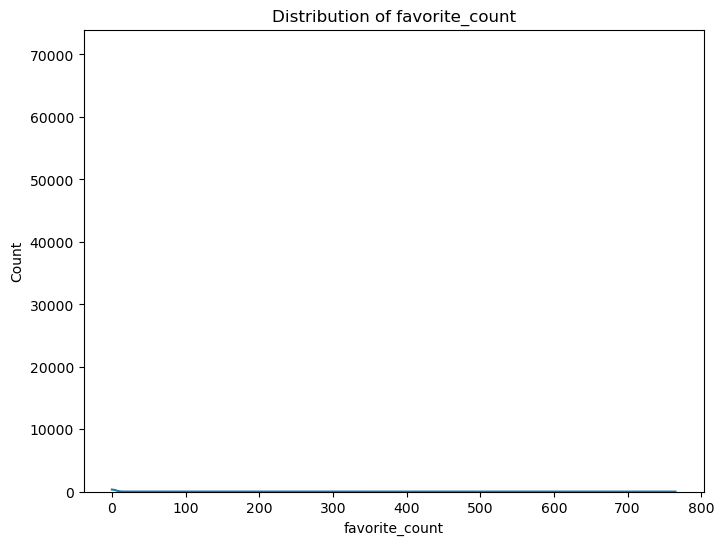

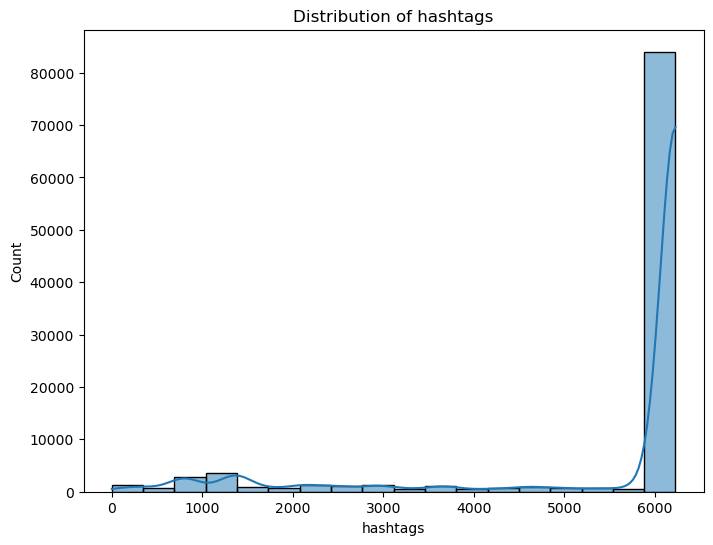

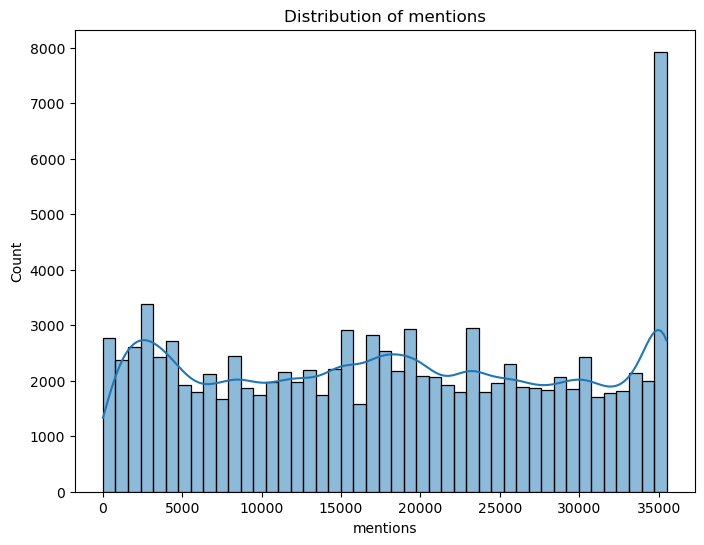

In [ ]:
for column in X_numerical.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(X_numerical[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


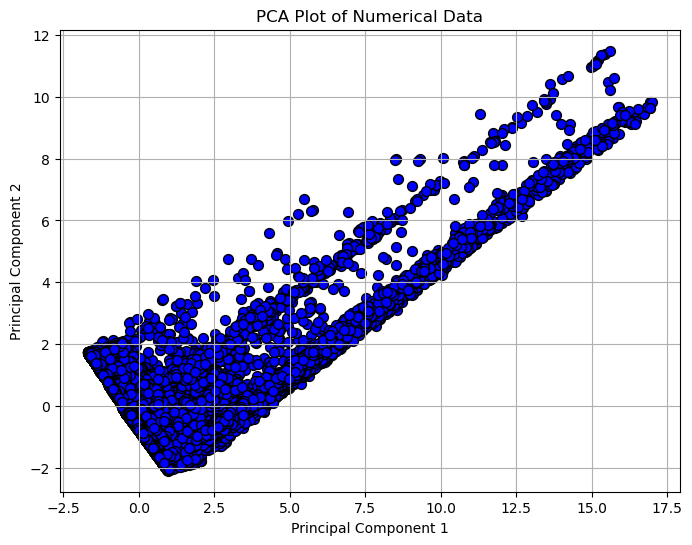

In [ ]:
from sklearn.decomposition import PCA

# Standardize the data before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Plot of Numerical Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


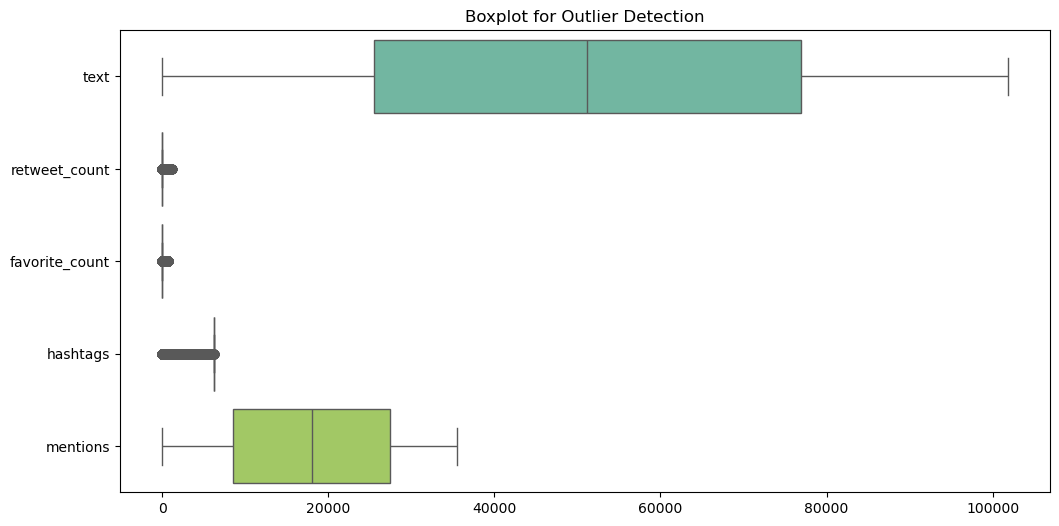

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_numerical, orient="h", palette="Set2")
plt.title("Boxplot for Outlier Detection")
plt.show()


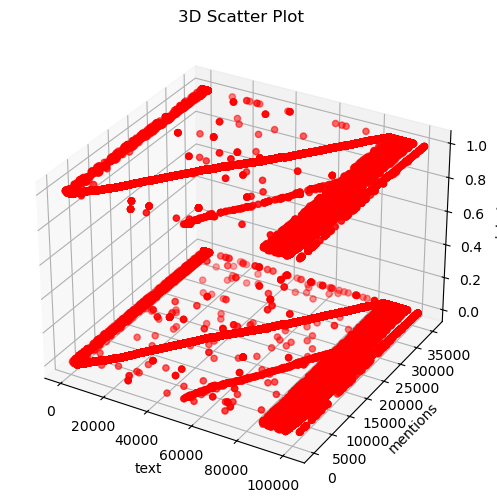

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Example: Select three columns to visualize
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_numerical['text'], X_numerical['mentions'], df['label'], c='r', marker='o')

ax.set_xlabel('text')
ax.set_ylabel('mentions')
ax.set_zlabel('label')
plt.title('3D Scatter Plot')
plt.show()


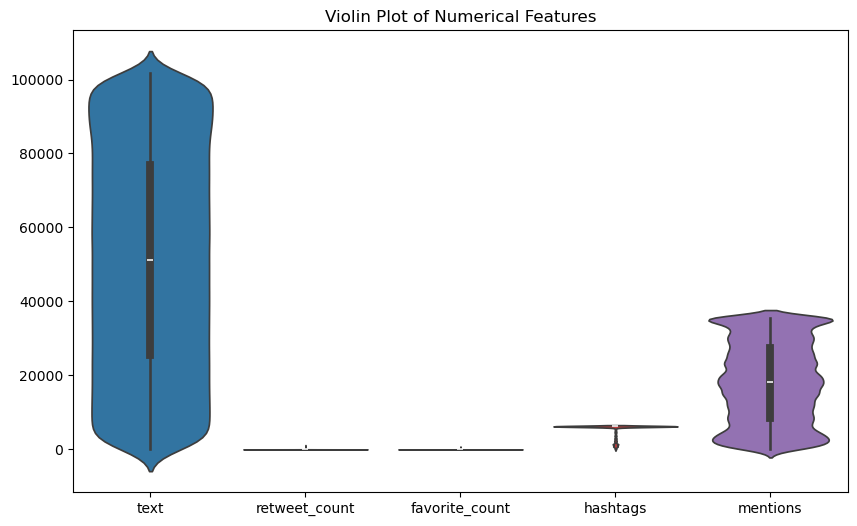

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=X_numerical)
plt.title("Violin Plot of Numerical Features")
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
sns.clustermap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Cluster Map of Correlation Matrix")
plt.show()


NameError: name 'corr_matrix' is not defined

<Figure size 1200x800 with 0 Axes>